## 2021-07-08 practice

### KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier

#k 즉 매개변수는 n_neighbors로 1
classifier = KNeighborsClassifier(n_neighbors=1)


#훈련데이터
training_points=[
    [0.5,0.2,0.1],
    [0.9,0.7,0.3],
    [0.4,0.5,0.7]
]

#label는 각 훈련 데이터에 대한 라벨들
training_labels=[0,1,1]

classifier.fit(training_points,training_labels)

unknown_points=[
    [0.2,0.1,0.7]
]

guesses=classifier.predict(unknown_points)

print(guesses)

[1]


#### 키와 몸무게 예측

In [26]:

training_points=[
    [158,58],
    [158,59],
    [158,63],
    [160,59],
    [160,60],
    [163,60],
    [163,61],
    [160,64],
    [163,64],
    [165,61],
    [165,62],
    [165,65],
    [168,62],
    [168,63],
    [168,66],
    [170,63],
    [170,64],
    [170,68]
]

training_labels=[0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1]

unknown_points=[
    [161,61]
]

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(training_points,training_labels)
guesses=classifier.predict(unknown_points)
print(guesses)


[0]


#### 분류 모델 성능 평가

In [44]:
#training_point을 20%의 test로 나누는 작업

from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test=train_test_split(training_points,training_labels,test_size=0.2,random_state=4)

from sklearn.neighbors import KNeighborsClassifier

training_points=[
    [158,58],
    [158,59],
    [158,63],
    [160,59],
    [160,60],
    [163,60],
    [163,61],
    [160,64],
    [163,64],
    [165,61],
    [165,62],
    [165,65],
    [168,62],
    [168,63],
    [168,66],
    [170,63],
    [170,64],
    [170,68]
]

training_labels=[0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1]

print("X_train: ",X_train)
print("X_test",X_test)
print("y_train",y_train)
print("y_test",y_test)

X_train:  [[160, 60], [158, 58], [170, 63], [168, 62], [165, 62], [168, 63], [165, 61], [158, 63], [170, 68], [160, 64], [163, 64], [158, 59], [163, 60], [168, 66]]
X_test [[163, 61], [160, 59], [170, 64], [165, 65]]
y_train [0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1]
y_test [0, 0, 1, 1]


In [47]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train,y_train)
guesses=classifier.predict(X_test)
print(guesses)

[1 0 1 1]


 #### confusion matrix

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
print("confusion matrix")
print(confusion_matrix(y_test,guesses))


confusion matrix
[[1 1]
 [0 2]]


In [72]:
print(metrics.accuracy_score(y_test,guesses))
print(metrics.precision_score(y_test,guesses,average='binary'))
print(metrics.recall_score(y_test,guesses,average='binary'))
print(metrics.f1_score(y_test,guesses,average='binary'))

0.8771929824561403
0.9342105263157895
0.8875
0.9102564102564101


#### confusion matrix practice

In [61]:
#데이터 불러오기
from sklearn.datasets import load_breast_cancer
#load_boston : 보스톤 집값 데이터
#load_iris : 아이리스 붓꽃 데이터
#load_wine : 와인데이터

#어떻게 구성되어있는지 모름
cancer=load_breast_cancer()

#파일에 대해서 정보 얻기
filename=cancer.filename
descr=cancer.DESCR
feature_names=cancer.feature_names
target_names=cancer.target_names
training_points=cancer.data
training_labels=cancer.target

print("filename : ",filename)
print("descr : ",descr)
print("feature_names : ",feature_names)
print("target_names : ",target_names)
print("training_points : ",training_points)
print("training_labels : ",training_labels)



filename :  c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\datasets\data\breast_cancer.csv
descr :  .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/l

In [71]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(training_points,training_labels,test_size=0.2,random_state=4)

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)
guesses=classifier.predict(X_test)
print(guesses)

[1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1
 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0
 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1
 1 0 1]


In [68]:
#confusion_matrix의 수가 나오는것 

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,guesses))

[[29  5]
 [ 9 71]]


In [70]:
#나온 confusion matrix의 정확도, 예측도, 회율도 등을 구하는 것이다
print(metrics.accuracy_score(y_test,guesses))
print(metrics.precision_score(y_test,guesses,average='binary'))
print(metrics.recall_score(y_test,guesses,average='binary'))
print(metrics.f1_score(y_test,guesses,average='binary'))

0.8771929824561403
0.9342105263157895
0.8875
0.9102564102564101


#### 분류모델의 성능향상

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("Heart.csv")
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [3]:
print(df.head())

   Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   
3           4   37    1    nonanginal     130   250    0        0    187   
4           5   41    0    nontypical     130   204    0        2    172   

   ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0      0      2.3      3  0.0       fixed   No  
1      1      1.5      2  3.0      normal  Yes  
2      1      2.6      2  2.0  reversable  Yes  
3      0      3.5      3  0.0      normal   No  
4      0      1.4      1  0.0      normal   No  


In [4]:
print(df.shape)

(303, 15)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB
None


In [6]:
print(df.isnull().sum())

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64


In [7]:
#필요없는 값들 지우기

df_n=df.dropna()

print(df_n.head())

   Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   
3           4   37    1    nonanginal     130   250    0        0    187   
4           5   41    0    nontypical     130   204    0        2    172   

   ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0      0      2.3      3  0.0       fixed   No  
1      1      1.5      2  3.0      normal  Yes  
2      1      2.6      2  2.0  reversable  Yes  
3      0      3.5      3  0.0      normal   No  
4      0      1.4      1  0.0      normal   No  


In [8]:
print(df_n.shape)
print(df_n.info())
print(df_n.isnull().sum())

(297, 15)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  297 non-null    int64  
 1   Age         297 non-null    int64  
 2   Sex         297 non-null    int64  
 3   ChestPain   297 non-null    object 
 4   RestBP      297 non-null    int64  
 5   Chol        297 non-null    int64  
 6   Fbs         297 non-null    int64  
 7   RestECG     297 non-null    int64  
 8   MaxHR       297 non-null    int64  
 9   ExAng       297 non-null    int64  
 10  Oldpeak     297 non-null    float64
 11  Slope       297 non-null    int64  
 12  Ca          297 non-null    float64
 13  Thal        297 non-null    object 
 14  AHD         297 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 37.1+ KB
None
Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG

In [9]:
#string값인 아이들을 버리기

le = LabelEncoder()
ChestPain_encoded=le.fit_transform(df_n['ChestPain'])
Thal_encoded=le.fit_transform(df_n['Thal'])
AHD_encoded=le.fit_transform(df_n['AHD'])

df_n['ChestPain_encoded']=ChestPain_encoded
df_n['Thal_encoded']=Thal_encoded
df_n['AHD_encoded']=AHD_encoded

df_n=df_n.drop(columns=['ChestPain','Thal','AHD'])

print(df_n.head())

   Unnamed: 0  Age  Sex  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0           1   63    1     145   233    1        2    150      0      2.3   
1           2   67    1     160   286    0        2    108      1      1.5   
2           3   67    1     120   229    0        2    129      1      2.6   
3           4   37    1     130   250    0        0    187      0      3.5   
4           5   41    0     130   204    0        2    172      0      1.4   

   Slope   Ca  ChestPain_encoded  Thal_encoded  AHD_encoded  
0      3  0.0                  3             0            0  
1      2  3.0                  0             1            1  
2      2  2.0                  0             2            1  
3      3  0.0                  1             1            0  
4      1  0.0                  2             1            0  


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


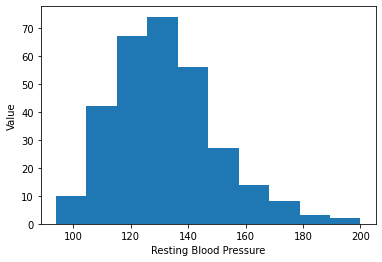

In [10]:
plt.hist(df['RestBP'])
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Value')
plt.show()

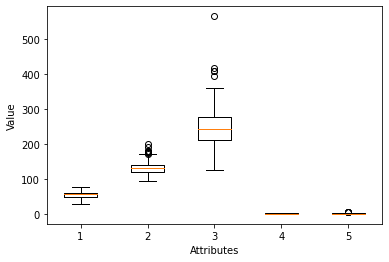

In [13]:
data_to_boxplot=[df_n['Age'],df_n['RestBP'],df_n['Chol'],df_n['Thal_encoded'],df_n['Oldpeak']]

plt.boxplot(data_to_boxplot)
plt.xlabel('Attributes')
plt.ylabel('Value')
plt.show()

In [16]:
training_points=df_n.drop(columns=['AHD_encoded'])
training_labels=df_n['AHD_encoded']

x_train,x_test,y_train,y_test=train_test_split(training_points,training_labels,test_size=0.3,random_state=4)

print("x_train: ",x_train)
print("x_test",x_test)
print("y_train",y_train)
print("y_test",y_test)

x_train:       Unnamed: 0  Age  Sex  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
19           20   49    1     130   266    0        0    171      0      0.6   
261         262   58    0     136   319    1        2    152      0      0.0   
82           83   39    1     140   321    0        2    182      0      0.0   
66           67   60    1     140   185    0        2    155      0      3.0   
206         207   58    1     128   259    0        2    130      1      3.0   
..          ...  ...  ...     ...   ...  ...      ...    ...    ...      ...   
58           59   54    1     125   273    0        2    152      0      0.5   
88           89   53    0     138   234    0        2    160      0      0.0   
200         201   50    0     110   254    0        2    159      0      0.0   
176         177   52    1     108   233    1        0    147      0      0.1   
123         124   55    1     140   217    0        0    111      1      5.6   

     Slope   Ca  ChestPain_en

In [17]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)

guesses=classifier.predict(x_test)

print(guesses)

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0
 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1
 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1]


In [21]:
print(confusion_matrix(y_test,guesses))
print("accuracy score : ",metrics.accuracy_score(y_test,guesses))
print("precision score : ",metrics.precision_score(y_test,guesses,average='binary'))
print("recall score : ",metrics.recall_score(y_test,guesses,average='binary'))
print("f1 score : ",metrics.f1_score(y_test,guesses,average='binary'))

[[26 16]
 [23 25]]
accuracy score :  0.5666666666666667
precision score :  0.6097560975609756
recall score :  0.5208333333333334
f1 score :  0.5617977528089888


max_k:  3
max:  0.7


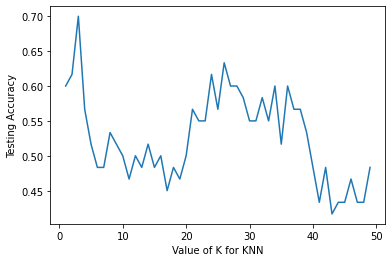

In [48]:
#for문을 이용한 k값 바꾸기

k_range=range(1,50)
accuracy_scores=[]

for k in k_range:
    classifier2=KNeighborsClassifier(n_neighbors=k)
    classifier2.fit(x_train,y_train)
    
    guesses=classifier2.predict(x_test)
    accuracy_scores.append(metrics.accuracy_score(y_test,guesses))
    
print("max_k: ",accuracy_scores.index(max(accuracy_scores))+1)
print("max: ",max(accuracy_scores))

plt.plot(k_range,accuracy_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy")
plt.show()

In [33]:
training_points=df_n.drop(columns=['AHD_encoded'])
training_labels=df_n['AHD_encoded']

x_train,x_test,y_train,y_test=train_test_split(training_points,training_labels,test_size=0.2,random_state=4)

print("x_train: ",x_train)
print("x_test",x_test)
print("y_train",y_train)
print("y_test",y_test)

x_train:       Unnamed: 0  Age  Sex  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
16           17   48    1     110   229    0        0    168      0      1.0   
93           94   44    0     108   141    0        0    175      0      0.6   
161         162   77    1     125   304    0        2    162      1      0.0   
264         265   61    1     138   166    0        2    125      1      3.6   
42           43   71    0     160   302    0        0    162      0      0.4   
..          ...  ...  ...     ...   ...  ...      ...    ...    ...      ...   
58           59   54    1     125   273    0        2    152      0      0.5   
88           89   53    0     138   234    0        2    160      0      0.0   
200         201   50    0     110   254    0        2    159      0      0.0   
176         177   52    1     108   233    1        0    147      0      0.1   
123         124   55    1     140   217    0        0    111      1      5.6   

     Slope   Ca  ChestPain_en

In [34]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)

guesses=classifier.predict(x_test)

print(guesses)

[0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0
 1 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1]


In [35]:
print(confusion_matrix(y_test,guesses))
print("accuracy score : ",metrics.accuracy_score(y_test,guesses))
print("precision score : ",metrics.precision_score(y_test,guesses,average='binary'))
print("recall score : ",metrics.recall_score(y_test,guesses,average='binary'))
print("f1 score : ",metrics.f1_score(y_test,guesses,average='binary'))

[[22  9]
 [14 15]]
accuracy score :  0.6166666666666667
precision score :  0.625
recall score :  0.5172413793103449
f1 score :  0.5660377358490567


max_k:  3
max:  0.7


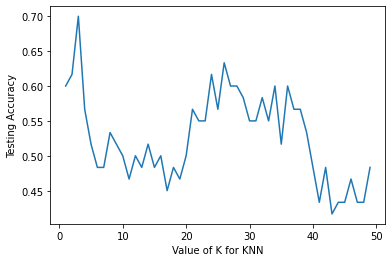

In [49]:
# 정규화
from sklearn.preprocessing import StandardScaler

df_model=df_n.copy()

scaler=StandardScaler()

features=[['Age','RestBP',"Chol",'MaxHR','Oldpeak']]
for features in features:
    df_model[features]=scaler.fit_transform(df_model[features])
    
training_points=df_model.drop(columns=['AHD_encoded'])
training_labels=df_model['AHD_encoded']



x_train,x_test,y_train,y_test=train_test_split(training_points,training_labels,test_size=0.2,random_state=4)


k_range=range(1,50)
accuracy_scores=[]

for k in k_range:
    classifier2=KNeighborsClassifier(n_neighbors=k)
    classifier2.fit(x_train,y_train)
    
    guesses=classifier2.predict(x_test)
    accuracy_scores.append(metrics.accuracy_score(y_test,guesses))
    
print("max_k: ",accuracy_scores.index(max(accuracy_scores))+1)
print("max: ",max(accuracy_scores))

plt.plot(k_range,accuracy_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy")
plt.show()

max_k:  1
max:  0.65


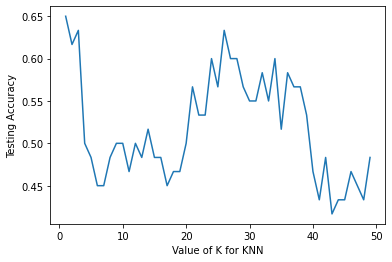

In [50]:
from sklearn.preprocessing import MinMaxScaler

df_model=df_n.copy()

scaler=MinMaxScaler()

features=[['Age','RestBP',"Chol",'MaxHR','Oldpeak']]
for features in features:
    df_model[features]=scaler.fit_transform(df_model[features])
    
training_points=df_model.drop(columns=['AHD_encoded'])
training_labels=df_model['AHD_encoded']



x_train,x_test,y_train,y_test=train_test_split(training_points,training_labels,test_size=0.2,random_state=4)


k_range=range(1,50)

#변수
accuracy_scores=[]

for k in k_range:
    classifier2=KNeighborsClassifier(n_neighbors=k)
    classifier2.fit(x_train,y_train)
    
    guesses=classifier2.predict(x_test)
    accuracy_scores.append(metrics.accuracy_score(y_test,guesses))
    
print("max_k: ",accuracy_scores.index(max(accuracy_scores))+1)
print("max: ",max(accuracy_scores))

plt.plot(k_range,accuracy_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy")
plt.show()

